# Image Colorization – Evaluation

This notebook evaluates the trained image colorization model using
quantitative image quality metrics.

The following metrics are reported:
- **PSNR (Peak Signal-to-Noise Ratio)**
- **SSIM (Structural Similarity Index)**

In [7]:
import sys
import os

PROJECT_ROOT = os.path.abspath("..")
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

## Imports

In [8]:
import os
import cv2
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import load_model
from src.infer import load_L, predict_color
from utils.eval import compute_metrics

## Load Model

In [9]:
MODEL_PATH = "../models/colorization_model.h5"

model = load_model(MODEL_PATH, compile=False)
print("Model loaded successfully")

Model loaded successfully


In [10]:
TEST_DIR = "../data/test"

test_images = [
    os.path.join(TEST_DIR, f)
    for f in os.listdir(TEST_DIR)
    if f.lower().endswith((".jpg", ".jpeg", ".png"))
]

print(f"Found {len(test_images)} test images")

Found 4 test images


## Evaluation

The trained model is evaluated on unseen test images that were not used during training.
For each image, the predicted colorized output is compared against the original color image.

Two standard image quality metrics are used:
- **PSNR** to measure reconstruction fidelity
- **SSIM** to measure perceptual structural similarity


In [11]:
psnr_scores = []
ssim_scores = []

for img_path in test_images:
    # Load original image
    orig = cv2.imread(img_path)
    orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
    orig = cv2.resize(orig, (128, 128))
    orig = orig.astype("float32") / 255.0

    # Predict colorized image
    L = load_L(img_path)
    pred = predict_color(model, L)

    # Compute metrics
    psnr, ssim = compute_metrics(orig, pred)
    psnr_scores.append(psnr)
    ssim_scores.append(ssim)

    print(f"{os.path.basename(img_path)} → PSNR: {psnr:.2f}, SSIM: {ssim:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step
1.jpg → PSNR: 29.30, SSIM: 0.9946
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
2.jpg → PSNR: 27.26, SSIM: 0.9749
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
3.jpg → PSNR: 25.37, SSIM: 0.9708
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
4.jpg → PSNR: 26.87, SSIM: 0.9780


## Average Metrics

The reported metrics indicate that the model produces visually plausible colorizations
while preserving structural consistency with the original images.

In [12]:
print("\nAverage Results:")
print(f"Average PSNR: {np.mean(psnr_scores):.2f}")
print(f"Average SSIM: {np.mean(ssim_scores):.4f}")


Average Results:
Average PSNR: 27.20
Average SSIM: 0.9796


## PSNR / SSIM Bar Graph

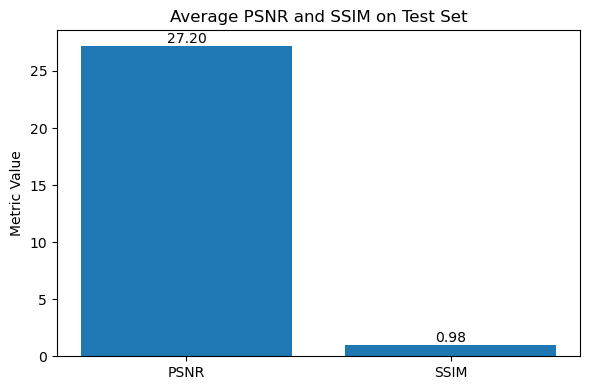

In [13]:
import matplotlib.pyplot as plt
import numpy as np

avg_psnr = np.mean(psnr_scores)
avg_ssim = np.mean(ssim_scores)

metrics = ["PSNR", "SSIM"]
values = [avg_psnr, avg_ssim]

plt.figure(figsize=(6,4))
bars = plt.bar(metrics, values)

plt.ylabel("Metric Value")
plt.title("Average PSNR and SSIM on Test Set")

# Annotate values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval,
             f"{yval:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()